<a href="https://colab.research.google.com/github/dgg32/ml_pycaret/blob/main/pycaret_regression_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# What is Regression?

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable', or 'target') and one or more independent variables (often called 'features', 'predictors', or 'covariates'). The objective of regression in machine learning is to predict continuous values such as sales amount, quantity, temperature etc.

# Overview of the Regression Module in PyCaret

PyCaret's Regression module (pycaret.regression) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

# Dataset for the Tutorial

For this tutorial we will use a dataset based on a case study called "Sarah Gets a Diamond". This case was presented in the first year decision analysis course at Darden School of Business (University of Virginia). The basis for the data is a case regarding a hopeless romantic MBA student choosing the right diamond for his bride-to-be, Sarah. The data contains 6000 records for training. Short descriptions of each column are as follows:

    ID: Uniquely identifies each observation (diamond)
    Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip
    Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)
    Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)
    Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)
    Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
    Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
    Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities
    Price: The amount in USD that the diamond is valued Target Column


In [5]:
from pycaret.datasets import get_data
dataset = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
dataset.shape

(6000, 8)



In order to demonstrate the predict_model() function on unseen data, a sample of 600 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 600 records are not available at the time when the machine learning experiment was performed.


In [7]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print (f"Data for modeling: {data.shape}")
print (f"Unseen Data for predictions: {data_unseen.shape}")

Data for modeling: (5400, 8)
Unseen Data for predictions: (600, 8)


# Setting up Environment in PyCaret



The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the numeric_features and categorical_features parameters in setup().


In [8]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = "Price", session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"




Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial. However, a few important things to note at this stage include:

    session_id : A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

    Original Data : Displays the original shape of dataset. In this experiment (5400, 8) means 5400 samples and 8 features including the target column.

    Missing Values : When there are missing values in the original data, this will show as True. For this experiment there are no missing values in the dataset.

    Numeric Features : Number of features inferred as numeric. In this dataset, 1 out of 8 features are inferred as numeric.

    Categorical Features : Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical.

    Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (5400, 8) is transformed into (3779, 28) for the transformed train set. The number of features has increased from 8 from 28 due to categorical encoding

    Transformed Test Set : Displays the shape of transformed test/hold-out set. There are 1621 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled, such as missing value imputation (in this case there are no missing values in training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.


# Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [9]:
best = compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,630.8795,2.082271e+06,1373.9172,0.9804,0.0672,0.0492,1.305
et,Extra Trees Regressor,762.0118,2.763999e+06,1612.2410,0.9729,0.0817,0.0607,1.303
xgboost,Extreme Gradient Boosting,708.8427,2.799609e+06,1607.9791,0.9724,0.0743,0.0541,0.915
rf,Random Forest Regressor,760.6304,2.929683e+06,1663.0148,0.9714,0.0818,0.0597,1.200
lightgbm,Light Gradient Boosting Machine,752.6446,3.056348e+06,1687.9907,0.9711,0.0773,0.0567,0.077
gbr,Gradient Boosting Regressor,920.0795,3.763129e+06,1900.8431,0.9633,0.1024,0.0770,0.260
dt,Decision Tree Regressor,1003.1237,5.305620e+06,2228.7271,0.9476,0.1083,0.0775,0.030
ridge,Ridge Regression,2413.5700,1.412050e+07,3726.1655,0.8621,0.6689,0.2875,0.016
lasso,Lasso Regression,2412.1923,1.424680e+07,3744.2305,0.8608,0.6767,0.2866,0.036
llar,Lasso Least Angle Regression,2355.6153,1.427202e+07,3745.3097,0.8607,0.6391,0.2728,0.018




Two simple words of code (not even a line) have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using R2 (highest to lowest) which can be changed by passing sort parameter. For example compare_models(sort = 'RMSLE') will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using n_select parameter. </br>

Notice that how exclude parameter is used to block certain models (in this case RANSAC). In the next release of PyCaret 2.1, blacklist parameter is replaced with the term exclude and whitelist parameter will be replaced with the term include.


# Create a Model



create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

    AdaBoost Regressor ('ada')
    Light Gradient Boosting Machine ('lightgbm')
    Decision Tree ('dt')

There are 25 regressors available in the model library of PyCaret. To see list of all regressors either check the docstring or use models function to see the library.



In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
ada = create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,2.301383e+07,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,2.929675e+07,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,2.229166e+07,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,2.348278e+07,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,2.446181e+07,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,2.973391e+07,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,2.784109e+07,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,2.597975e+07,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,2.109707e+07,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,2.481557e+07,4981.5225,0.7637,0.5495,0.6592


In [12]:
print (ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [13]:
lightgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1.051763e+06,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5.638866e+06,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3.328375e+06,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1.697211e+06,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1.799949e+06,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6.423604e+06,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3.353992e+06,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1.930223e+06,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2.211933e+06,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3.127561e+06,1768.4913,0.9702,0.0872,0.0609


In [14]:
dt = create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2.456840e+06,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9.852564e+06,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2.803663e+06,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3.926739e+06,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9.751516e+06,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7.833771e+06,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3.989282e+06,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2.182535e+06,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4.904945e+06,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5.354348e+06,2313.9463,0.9490,0.1230,0.0847


Notice that the Mean score of all models matches with the score printed in compare_models(). This is because the metrics printed in the compare_models() score grid are the average scores across all CV folds. Similar to compare_models(), if you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For Example: create_model('dt', fold = 5) to create Decision Tree using 5 fold cross validation.

# Tune a Model

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass custom_grid parameter in the tune_model function (see 9.2 LightGBM tuning below).

In [15]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2759.6611,1.638071e+07,4047.3092,0.8202,0.2808,0.2613
1,2901.3392,2.257290e+07,4751.0950,0.8270,0.3087,0.2942
2,2791.3101,1.582978e+07,3978.6660,0.8548,0.3135,0.3086
3,2622.3949,1.464752e+07,3827.2073,0.8384,0.2717,0.2334
4,2457.5786,1.456299e+07,3816.1492,0.8184,0.2671,0.2264
5,2686.6949,1.947149e+07,4412.6509,0.8338,0.3001,0.2783
6,2780.2231,1.735783e+07,4166.2735,0.8369,0.3054,0.2822
7,2898.4723,1.803168e+07,4246.3730,0.7720,0.3076,0.2929
8,2593.3611,1.513467e+07,3890.3304,0.8514,0.2964,0.2719
9,2533.0852,1.582092e+07,3977.5515,0.8494,0.2943,0.2714


In [16]:
print (tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.175, loss='exponential',
                  n_estimators=60, random_state=123)


## Light Gradient Boosting Machine

In [17]:
import numpy as np

lgbm_params = {"num_leaves": np.arange(10, 200, 10), "max_depth": [int(x) for x in np.linspace(10, 110, num=11)], "learning_rate": np.arange(0.1, 1, 0.1)}

tuned_lightgbm = tune_model(lightgbm, custom_grid=lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,649.2541,1.131046e+06,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5.518412e+06,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3.024520e+06,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1.774260e+06,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1.974576e+06,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6.725524e+06,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3.324499e+06,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1.872493e+06,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2.274682e+06,1508.2050,0.9777,0.0766,0.0579
9,768.3451,3.247099e+06,1801.9707,0.9691,0.0885,0.0594


In [18]:
print (tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2.895159e+06,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6.686388e+06,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3.275430e+06,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4.037155e+06,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7.889521e+06,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,1.102131e+07,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4.463866e+06,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3.271029e+06,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4.441966e+06,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5.192339e+06,2278.6705,0.9506,0.1224,0.0873




By default, tune_model optimizes R2 but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'MAE') will search for the hyperparameters of a Decision Tree Regressor that results in the lowest MAE instead of highest R2. For the purposes of this example, we have used the default metric R2 for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can click here to develop an understanding on regression error metrics.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Light Gradient Boosting Machine stored in the tuned_lightgbm variable as our best model for the remainder of this tutorial.


# Plot a Model



Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.


## Residual Plot

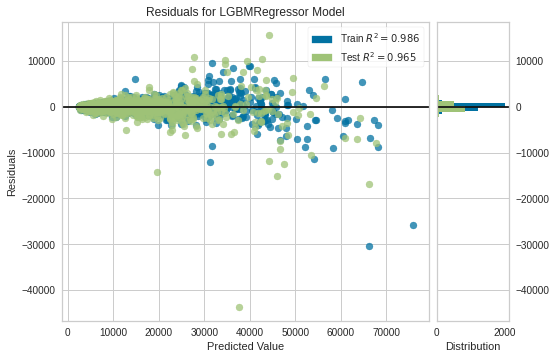

In [20]:
plot_model(tuned_lightgbm)

## Prediction Error Plot

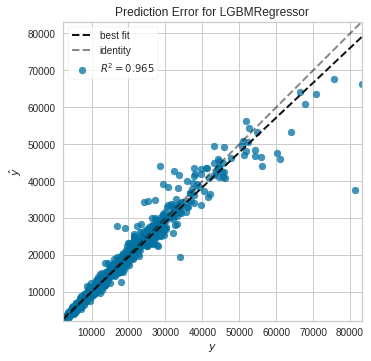

In [21]:
plot_model(tuned_lightgbm, plot="error")

## Feature Importance Plot

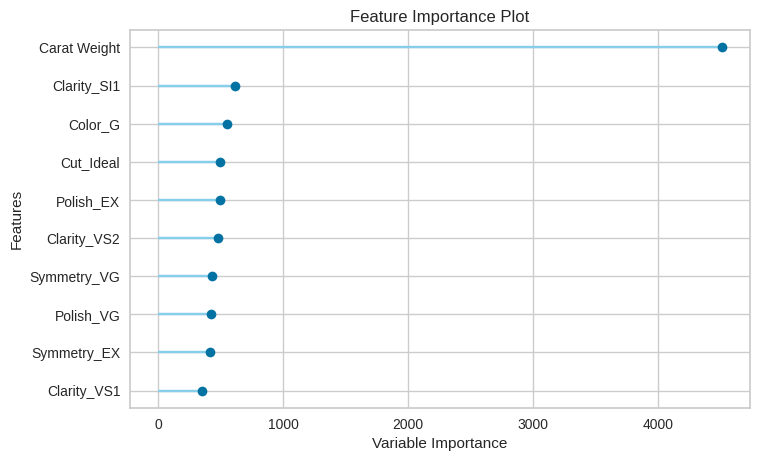

In [22]:
plot_model(tuned_lightgbm, plot="feature")

Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [23]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (1621 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the tuned_lightgbm variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [24]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3.816757e+06,1953.6523,0.9652,0.0787,0.0558


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059.0,6405.760193
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809.0,5872.412022
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641.0,10778.368342
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871.0,2713.936104
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706.0,21534.553191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906.0,12936.837831
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235.0,3493.734351
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058.0,9611.741400
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091.0,5227.172140


 # Finalize Model for Deployment

 Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [25]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [26]:
print (final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)




Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_lightgbm under predict_model() to compare the information grid with the one above in section 11.


In [27]:


predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.916,1.199892e+06,1095.3958,0.9891,0.0498,0.0362


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059.0,6751.855464
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809.0,6000.339410
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641.0,11388.163423
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871.0,2836.345904
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706.0,22518.138181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906.0,13096.272663
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235.0,3477.710329
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058.0,9174.238962
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091.0,5194.141841


Notice how the R2 in the final_lightgbm has increased to 0.9897 from 0.9678, even though the model is same. This is because the final_lightgbm variable is trained on the complete dataset including the test/hold-out set.

# Predict on Unseen Data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% (600 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [28]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


The Label column is added onto the data_unseen set. Label is the predicted value using the final_lightgbm model. If you want predictions to be rounded, you can use round parameter inside predict_model(). You can also check the metrics on this since you have actual target column Price available. To do that we will use pycaret.utils module. See example below:

In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

# Saving the Model

We have now finished the experiment by finalizing the tuned_lightgbm model which is now stored in final_lightgbm variable. We have also used the model stored in final_lightgbm to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [30]:
save_model(final_lightgbm, 'final lightgbm model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

# Loading the Saved Model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [31]:
saved_final_lightgbm = load_model("final lightgbm model")

Transformation Pipeline and Model Successfully Loaded




Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen that we used in section 13 above.


In [32]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964




Notice that the results of unseen_predictions and new_prediction are identical.


In [33]:
check_metric(new_prediction.Price, new_prediction.Label, "R2")

0.9779